In [ ]:
# THIS PROGRAM IS WRITTEN BY MOHIBUL AKTAR MOLLAH
import pandas as pd
df = pd.read_csv("carprices - carprices.csv")
df.head(6)

,Car_Model,Mileage,SellPrices,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5


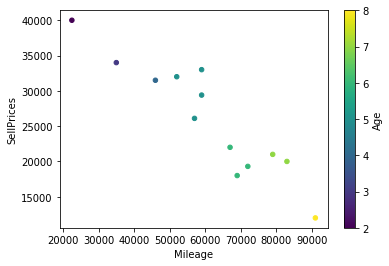

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax = df.plot.scatter(x='Mileage',y='SellPrices',c='Age',colormap='viridis',ax=ax);

Therefore, Linear Regression can be applied

In [ ]:
dummies = pd.get_dummies(df.Car_Model)
dummies


,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [ ]:
final = pd.concat([df,dummies], axis='columns')
final

,Car_Model,Mileage,SellPrices,Age,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [ ]:
final = final.drop(['Car_Model','Audi A5'], axis='columns')
final

,Mileage,SellPrices,Age,BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
X = final.drop('SellPrices',axis='columns')
X

,Mileage,Age,BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [ ]:
y = df[['SellPrices']]
y

,SellPrices
0,18000
1,34000
2,26100
3,40000
4,31500
5,29400
6,32000
7,19300
8,12000
9,22000


In [ ]:
LR.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
LR.predict([[45000,4,0,1]])   #Mercedez Benz C Class

array([[36991.31721061]])

In [ ]:
LR.predict([[86000,7,1,0]])   #BMW X5

array([[11080.74313219]])

In [ ]:
LR.score(X,y)   #score(accuracy)

0.9417050937281082

SAVE MODEL

In [ ]:
import pickle
with open('model_pickle', 'wb') as file:
  pickle.dump(LR,file)

LOAD MODEL

In [ ]:
with open('model_pickle', 'rb') as file:
  My_Model = pickle.load(file)

In [ ]:
My_Model.predict([[86000,7,1,0]])

array([[11080.74313219]])

In [ ]:
My_Model.predict([[51000,2,0,1]])

array([[37435.49189951]])